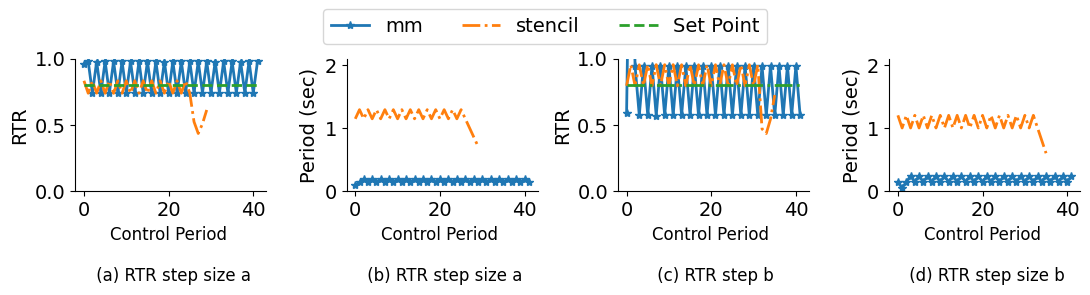

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Helper function to read data from text files
def read_data(file_path):
    return [float(line.strip()) for line in open(file_path, 'r').readlines()]

# Read data for condition a (RTR and Period)
s1a = read_data('logs/s1a.txt')
s2a = read_data('logs/s2aa.txt')
p1a = read_data('logs/p1a.txt')
p2a = read_data('logs/p2aa.txt')

# Read data for condition b (RTR and Period)
s1b = read_data('logs/s1b.txt')
s2b = read_data('logs/s2bb.txt')
p1b = read_data('logs/p1b.txt')
p2b = read_data('logs/p2bb.txt')

# Define setpoint arrays (here, using 0.80 for both RTR plots)
setpoint_a = [0.80] * len(s1a)
setpoint_b = [0.80] * len(s1b)

x_a = np.arange(1, len(s1a) + 1)
x_b = np.arange(1, len(s1b) + 1)

idx = slice(5, -1) #since t2 takes more time to warmup

# Create a 1x4 subplot figure with a small overall size
#fig, axs = plt.subplots(1, 4, figsize=(10, 2.5), sharex=False)
fig, axs = plt.subplots(1, 4, figsize=(11, 3), sharex=False)

# ------------------- Subplot 1: RTR for condition a -------------------
line1, = axs[0].plot(np.array(s1a)[idx], '-*', label='mm', linewidth=2)
line2, = axs[0].plot(np.array(s2a)[idx], '-.', label='stencil', linewidth=2)
line3, = axs[0].plot(np.array(setpoint_a)[idx], '--', label='Set Point', linewidth=2)
axs[0].set_xlabel('Control Period \n \n (a) RTR step size a', fontsize=12)
axs[0].set_ylabel('RTR', fontsize=14)
axs[0].set_ylim([0, 1])
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
#axs[0].spines['left'].set_color('gray')
#axs[0].spines['left'].set_linewidth(0.5)
#axs[0].spines['bottom'].set_color('gray')
#axs[0].spines['bottom'].set_linewidth(0.5)

# ------------------- Subplot 2: Period for condition a -------------------
line4, = axs[1].plot(np.array(p1a)[idx], '-*', label='t1', linewidth=2)
line5, = axs[1].plot(np.array(p2a)[idx], '-.', label='t2', linewidth=2)
axs[1].set_xlabel('Control Period \n \n (b) RTR step size a', fontsize=12)
axs[1].set_ylabel('Period (sec)', fontsize=14)
axs[1].set_ylim([0, 2.1])
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
#axs[1].spines['left'].set_color('gray')
#axs[1].spines['left'].set_linewidth(0.5)
#axs[1].spines['bottom'].set_color('gray')
#axs[1].spines['bottom'].set_linewidth(0.5)
axs[1].spines['top'].set_visible(False)

# ------------------- Subplot 3: RTR for condition b -------------------
line6, = axs[2].plot(np.array(s1b)[idx], '-*', label='mm', linewidth=2)
line7, = axs[2].plot(np.array(s2b)[idx], '-.', label='stencil', linewidth=2)
line8, = axs[2].plot(np.array(setpoint_b)[idx], '-.', label='Set Point', linewidth=2)
axs[2].set_xlabel('Control Period \n \n (c) RTR step b', fontsize=12)
axs[2].set_ylabel('RTR', fontsize=14)
axs[2].set_ylim([0, 1])
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
#axs[2].spines['left'].set_color('gray')
#axs[2].spines['left'].set_linewidth(0.5)
#axs[2].spines['bottom'].set_color('gray')
#axs[2].spines['bottom'].set_linewidth(0.5)

# ------------------- Subplot 4: Period for condition b -------------------
line9, = axs[3].plot(np.array(p1b)[idx], '-*', label='t1', linewidth=2)
line10, = axs[3].plot(np.array(p2b)[idx], '-.', label='t2', linewidth=2)
axs[3].set_xlabel('Control Period \n \n (d) RTR step size b', fontsize=12)
axs[3].set_ylabel('Period (sec)', fontsize=14)
axs[3].spines['top'].set_visible(False)
axs[3].spines['right'].set_visible(False)
#axs[3].spines['left'].set_color('gray')
#axs[3].spines['left'].set_linewidth(0.5)
#axs[3].spines['bottom'].set_color('gray')
#axs[3].spines['bottom'].set_linewidth(0.5)
axs[3].set_ylim([0, 2.1])

# Set tick label size for each axis
for ax in axs:
    ax.tick_params(axis='both', labelsize=14)

# Create one common legend spanning all subplots at the top.
# We combine the legend items from the RTR plots (mm, stencil, Setpoint) and the period plots (t1, t2).
# Here, we use the handles from subplot 0 and subplot 1.
handles = [line1, line2, line3, line4, line5]
labels = ["mm", "stencil", "Set Point"]
fig.legend(handles, labels, loc='upper center', ncol=5, frameon=True, fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.88])  # leave space at the top for the legend
plt.savefig("figures/adhocfin.pdf", dpi=300, bbox_inches='tight', format='pdf')
plt.show()